In [165]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
plt.rcParams['font.family']=['']

In [1]:
df_policy_raw = pd.read_csv('../Tbrain_Insurance/policy_claim/policy_0702.csv')
df_claim_raw = pd.read_csv('../Tbrain_Insurance/policy_claim/claim_0702.csv')
df_training_raw = pd.read_csv('../Tbrain_Insurance/training-set.csv')
df_testing_raw = pd.read_csv('../Tbrain_Insurance/testing-set.csv')
df_policy = df_policy_raw 
df_claim = df_claim_raw 
df_training = df_training_raw
df_testing = df_testing_raw
pd.set_option('display.max_columns', None)

In [6]:
# Policy_Number	保單號碼 
# Insured's_ID	被保險人代號(替代值) 
# Prior_Policy_Number	前保單號     almost == Cancellation =='Y'
# Cancellation	非繼承自前保單        almost match "Prior_policy Number, only #12 w/o cancellation
# Vehicle_identifier	車牌號碼 
# Vehicle_Make_and_Model1	廠牌名稱一 
# Vehicle_Make_and_Model2	廠牌名稱二
# Manafactured_Year_and_Month	製造年份 
# Engine_Displacement_(Cubic_Centimeter)	排氣量 
# Imported_or_Domestic_Car	車系代號
# Coding_of_Vehicle_Branding_&_Type	廠牌車型代號
# qpt	乘載數量 
# fpt	乘載單位 
# Main_Insurance_Coverage_Group	險種分類 
# Insurance_Coverage	險種代碼
# Insured_Amount1	保額一 
# Insured_Amount2	保額二 
# Insured_Amount3	保額三
# Coverage_Deductible_if_applied	自負額 
# Premium	簽單保費 
# Replacement_cost_of_insured_vehicle	重置成本
# Distribution_Channel	主通路代號 
# Multiple_Products_with_TmNewa_(Yes_or_No?)	同一車主前一年度非車險保單件數
# lia_class	車責本期級數 
# plia_acc	車責賠款係數 
# pdmg_acc	車體賠款係數 
# fassured	被保險人性質
# ibirth	出生日期 
# fsex	性別 
# fmarriage	婚姻狀況 
# aassured_zip	郵遞區號
# iply_area	承保地區代號(分公司) 
# dbirth	要保人出生日期 
# fequipment1	配備-音響註記 
# fequipment2	配備-車箱註記 
# fequipment3	配備-冷凍機組註記 
# fequipment4	配備-車框、車斗註記 
# fequipment5	配備-昇降系統註記 
# fequipment6	配備-電動車電池註記
# fequipment9	配備-其他 
# nequipment9	配備-其他說明

In [8]:
# Policy File
df_policy.shape # total count  (1747942, 41)
df_policy['Policy_Number'].nunique() # 351273 unique value

351273

In [17]:
# Prior_Policy_Number
# is null: not null =  328557 : 1419385
df_policy[df_policy['Prior_Policy_Number'].isnull()]

,Policy_Number,Insured's_ID,Prior_Policy_Number,Cancellation,Vehicle_identifier,Vehicle_Make_and_Model1,Vehicle_Make_and_Model2,Manafactured_Year_and_Month,Engine_Displacement_(Cubic_Centimeter),Imported_or_Domestic_Car,Coding_of_Vehicle_Branding_&_Type,qpt,fpt,Main_Insurance_Coverage_Group,Insurance_Coverage,Insured_Amount1,Insured_Amount2,Insured_Amount3,Coverage_Deductible_if_applied,Premium,Replacement_cost_of_insured_vehicle,Distribution_Channel,Multiple_Products_with_TmNewa_(Yes_or_No?),lia_class,plia_acc,pdmg_acc,fassured,ibirth,fsex,fmarriage,aassured_zip,iply_area,dbirth,fequipment1,fequipment2,fequipment3,fequipment4,fequipment5,fequipment6,fequipment9,nequipment9
58,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,竊盜,05N,0,0,48000,10,90,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
59,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,16G,3000000,0,6000000,0,1280,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
60,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,16P,0,0,500000,0,973,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
61,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,29B,0,3000000,12000000,0,887,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
62,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,29K,0,0,3000000,0,475,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
63,5431130fb4fad06388f345f6e1d3e71ec1089d32,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,a27682ea8c6a0052885a96e8301d618c53912c75,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2003,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,竊盜,05N,0,0,41000,10,77,50.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,
64,5431130fb4fad06388f345f6e1d3e71ec1089d32,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,a27682ea8c6a0052885a96e8301d618c53912c75,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2003,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,16G,3000000,0,6000000,0,1280,50.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0

## Imported_or_Domestic_Car : 車系代號

<Container object of 10 artists>

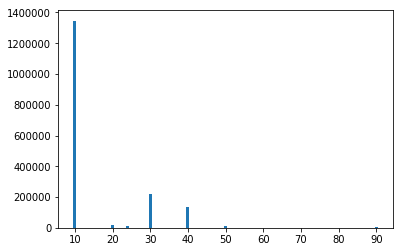

In [69]:
# 10	國產車 77%
# 20	美國車  1%
# 21	福特
# 22	通用
# 23	克萊斯勒
# 24	美規日車 1%
# 30	歐洲車 12.5%
# 40	日本車 7.7%
# 50	韓國車
# 90	其它

# counts
# df_car.groupby('Imported_or_Domestic_Car').count()
# 10    1346381
# 20      15375
# 21        858
# 22        207
# 23         29
# 24      14459
# 30     218102
# 40     134929
# 50      12249
# 90       5353

car_types = sorted(df_policy['Imported_or_Domestic_Car'].unique()) # [10, 20, 21, 22, 23, 24, 30, 40, 50, 90]

# for b in sorted(set(df_policy['Imported_or_Domestic_Car'])):
#     print(b, "  ", df_policy[df_policy['Imported_or_Domestic_Car'] == b].shape[0] / df_policy.shape[0] * 100, "%")
plt.bar(car_types, df_car['Imported_or_Domestic_Car'].value_counts().sort_index().values)

<Container object of 6 artists>

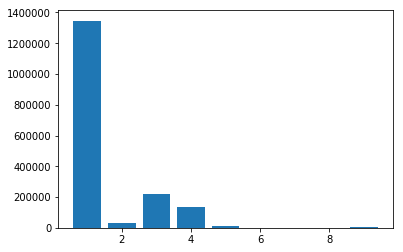

In [84]:
#  Imported_or_Domestic_Car 十位數
df_car = df_policy[['Imported_or_Domestic_Car']].copy()
df_car['car_types'] = (df_car['Imported_or_Domestic_Car'] /10).apply(np.floor)
df_car['car_types'].value_counts().sort_index().values
plt.bar(sorted(df_car['car_types'].unique()), df_car['car_types'].value_counts().sort_index())

## Coverage_Deductible_if_applied (自負額) 類別參照:險種分類及自負額說明Sheet

<Container object of 53 artists>

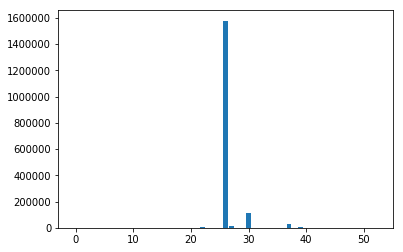

In [134]:
# Coverage_Deductible_if_applied(自負額) value counts

# 0   : 90.25%
# 10  : 6.4%
# 100 : 1.77%
# ...
# ==
# -100000          2
# -50000           2
# -35000           1
# -30000           5
# -22455          19
# -20000          22
# -15000           6
# -12455          30
# -10000          14
# -8000            3
# -5000           12
# -3000            9
# -255            26
# -224             1
# -155           136
# -124             7
# -100          1321
# -70              4
# -50              4
# -40             18
# -24              1
# -20             45
# -10           3760
# -3               1
# -2              98
# -1             596
#  0         1577591  90.25%
#  1           12463
#  2            1554
#  3              13
#  10         112069
#  20           1115
#  24             25
#  40            233
#  48              9
#  50             81
#  70             67
#  100         30873
#  124           232
#  155          2487
#  255           192
#  3000          276
#  5000          318
#  7510            7
#  8000           54
#  10000         384
#  12455         939
#  15000         304
#  20000         204
#  22455          78
#  30000         216
#  50000          12
#  100000          3
Coverage_Deductible_if_applied_value_counts = df_policy['Coverage_Deductible_if_applied'].value_counts().sort_index()
plt.bar(np.arange(len(Coverage_Deductible_if_applied_value_counts)), Coverage_Deductible_if_applied_value_counts.values)

## Insurance_Coverage 險種代碼

In [138]:
# 險種代碼對應自負額
for c in sorted(set(df_policy['Insurance_Coverage'])):
    print(c," ", set(df_policy[df_policy['Insurance_Coverage'] == c]['Coverage_Deductible_if_applied']) )

00I   {0, 1, 2, 8000, 20000, -8000, 3, 10000, 30000, 15000, -3, -1}
01A   {0}
01J   {0}
02K   {0, 1, 2, 3, 10000, 15000, 20000, 100000, 30000, -50000, 8000, -8000, -35000, 50000, -30000, -20000, -100000, -15000, -10000, -1, -2}
03L   {0}
04M   {0, -20000, 20000, 8000, 5000, -3000, 30000, 50000, 10000, -30000, -50000, 3000, 15000, -5000}
05E   {0}
05N   {0, 10, -20, 20, -10}
06F   {0}
07P   {0}
08H   {0}
09@   {0}
09I   {7510}
10A   {0, 10, 100, -10}
12L   {0}
14E   {0, 1, 100, 10, 20, -10, 155, 124}
14N   {0, 10, 20, -10}
15F   {0, 100, 70, 40, -50, 50, -40, -70, -100}
15O   {-224, 1, 2, -255, -124, -155, 12455, -22455, -2, 22455, -12455, 155, 124, -1, 255}
16G   {0, 10000, 5000}
16P   {0, 10000, -5000, 5000}
18@   {0}
18I   {0}
20B   {0}
20K   {0}
25G   {0}
26H   {0}
27I   {0}
29B   {0}
29K   {0, 1, 10}
32N   {0, 24, 48}
33F   {0, 24, 48}
33O   {0, 24, 48, -24}
34P   {0}
35H   {0}
36I   {0}
37J   {10000, 30000}
40M   {0}
41E   {0}
41N   {0}
42F   {0}
45@   {0}
46A   {0}
47B   {0}
51O 

## Main_Insurance_Coverage_Group 險種分類

In [ ]:
# 車責    1253120
# 車損     318013
# 竊盜     176809
Main_Insurance_Coverage_Group_value_counts = df_policy['Main_Insurance_Coverage_Group'].value_counts()
plt.bar(['車責', '車損', '竊盜'], df_policy['Main_Insurance_Coverage_Group'].value_counts().sort_values())
df1 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='車責']
df2 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='竊盜']
df3 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='車損']
## 'lia_class'車責本期級數   分級1-19 新戶從4開始 出險（+3) 沒有出險 (-1)  
## -1(55%) 0(7.6%) 要怎麼解釋？  

# ----->
# 解1: -1 0 都當作 1 解2: 當成調整項 +10% x lia_class

col = 'lia_class'
print('車責',df1[col].shape) #車責 (1253120,)
print('竊盜',df2[col].shape) #竊盜 (176809,)
print('車損',df3[col].shape) #車損 (318013,)
# 車責本期級數
print('車責', sorted(set(df1[col])))
print('竊盜', sorted(set(df2[col])))
print('車損', sorted(set(df3[col])))

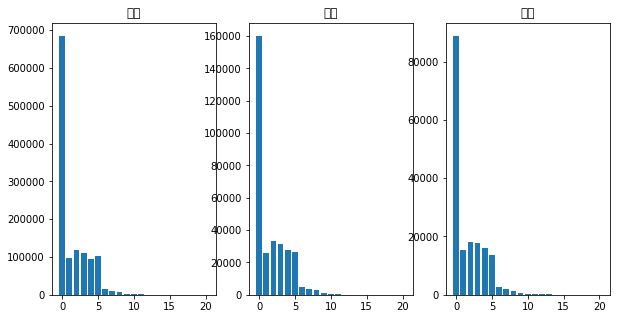

In [163]:
# 車責本期級數 in 險種分類
lia_classes = ['車責', '車損', '竊盜']
plt.figure(figsize=(10,5))
for index, lia_class in enumerate(lia_classes):
    lia_class_value_count = df_policy.loc[df_policy['Main_Insurance_Coverage_Group'] == lia_class, 'lia_class'].value_counts().sort_index()
    plt.subplot(1,3,index+1)
    plt.title(lia_class)
    plt.bar(np.arange(len(lia_class_value_count)), lia_class_value_count)
    
#     for x in sorted(set(df1[col])):
#         print(x, df1[df1['lia_class']== x].shape[0]/df1.shape[0]*100)  
# '''
# (%)
# -1  54.632198033707866 
# 0   7.66486848825332 
# 1   9.491189989785495 
# 2   8.888294816138917
# 3   7.6516215526046985
# 4   8.230975485188969
# 5   1.2548678498467825
# 6   0.8911357252298264
# 7   0.6505362614913177
# 8   0.2353326098059244
# 9   0.16678370786516852
# 10  0.09847420837589378
# 11  0.04365104698672114
# 12  0.0400600102145046
# 13  0.022902834525025534
# 14  0.010852911133810011
# 15  0.009576098059244127
# 16  0.007581077630234934
# 17  0.001995020429009193
# 18  0.0040698416751787534
# 19  0.0030324310520939736
# '''

## lia_class 車責本期級數

<Container object of 21 artists>

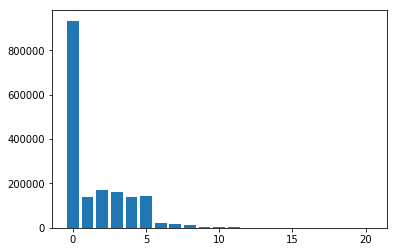

In [143]:
lia_class_value_count = df_policy['lia_class'].value_counts().sort_index()
plt.bar(np.arange(len(lia_class_value_count)), lia_class_value_count)

In [166]:
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
for i in a:
    print(i)

.Keyboard
.LastResort
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
Adobe Arabic
Adobe Arabic
Adobe Arabic
Adobe Arabic
Adobe